<a href="https://colab.research.google.com/github/PratishTiwari/AISem3/blob/master/HW/Home_Credit_Default_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [ ]:
train = pd.read_csv('D:Documents/NMIMS/Sem 3/AI/application_train.csv')
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test = pd.read_csv('D:/Documents/NMIMS/Sem 3/AI/application_test.csv')
test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
train.isnull().sum().sort_values(ascending=False)[:10]

COMMONAREA_MEDI             214865
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_MEDI    213514
NONLIVINGAPARTMENTS_AVG     213514
FONDKAPREMONT_MODE          210295
LIVINGAPARTMENTS_MEDI       210199
LIVINGAPARTMENTS_MODE       210199
LIVINGAPARTMENTS_AVG        210199
dtype: int64

In [ ]:
test.isnull().sum().sort_values(ascending=False)[:10]

COMMONAREA_MEDI             33495
COMMONAREA_AVG              33495
COMMONAREA_MODE             33495
NONLIVINGAPARTMENTS_MODE    33347
NONLIVINGAPARTMENTS_MEDI    33347
NONLIVINGAPARTMENTS_AVG     33347
FONDKAPREMONT_MODE          32797
LIVINGAPARTMENTS_AVG        32780
LIVINGAPARTMENTS_MEDI       32780
LIVINGAPARTMENTS_MODE       32780
dtype: int64

In [ ]:
print('Training Data shape :' ,train.shape)
print('Testing Data shape :' ,test.shape)

Training Data shape : (307511, 122)
Testing Data shape : (48744, 121)


In [ ]:
train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

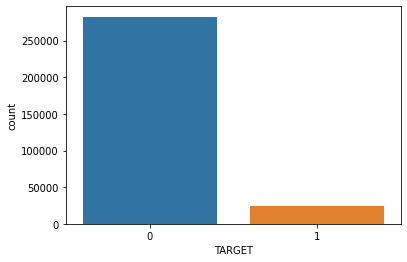

In [ ]:
sns.countplot(train.TARGET)
plt.show()

In [ ]:
train.select_dtypes('object').apply(pd.Series.nunique,axis=0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
for i in train:
  if train[i].dtype=='object':
        if len(list(train[i].unique()))<=2:
            label.fit(train[i])
            train[i]=label.transform(train[i])
            test[i]=label.transform(test[i])

In [ ]:
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [ ]:
data=pd.concat([train,test], ignore_index = True, sort = False)
print(data.shape)

(356255, 243)


In [ ]:
train=data[data['TARGET'].notnull()]

In [ ]:
test=data[data['TARGET'].isnull()]

In [ ]:
x=train.drop(columns=['TARGET'])
y=train['TARGET']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state =10)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy = 'median')
x_train=imputer.fit_transform(x_train)
x_test=imputer.transform(x_test)
scaler=MinMaxScaler(feature_range = (0, 1))
x_train_scale=scaler.fit_transform(x_train)
x_test_scale=scaler.transform(x_test)

In [ ]:
param={'penalty':['l1','l2'],'C':[0.1,0.001,0.0001,0.00001]}
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
log_reg = LogisticRegression()
clf=GridSearchCV(log_reg,param_grid=param,n_jobs=-1,verbose=1)
clf.fit(x_train_scale,y_train)

C:\Users\Public\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  1.5min finished
C:\Users\Public\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.1, 0.001, 0.0001, 1e-05],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [ ]:
clf.best_params_

{'C': 0.001, 'penalty': 'l1'}

In [ ]:
log_reg = LogisticRegression(C=0.001,penalty='l2')
log_reg.fit(x_train_scale,y_train)
y_pred = log_reg.predict_proba(x_test_scale)[:,1]
from sklearn.metrics import roc_auc_score
score = roc_auc_score(y_test,y_pred)
print(score)

C:\Users\Public\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7269487922407932


In [ ]:
from sklearn.ensemble import RandomForestClassifier
ranfo=RandomForestClassifier(max_depth=4, random_state=10)
ranfo.fit(x_train_scale,y_train)
from sklearn import metrics
y_pred1=ranfo.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred1))

C:\Users\Public\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9192722306228964


In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
data_dmatrix = xgb.DMatrix(data=x,label=y)

In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 10)

In [ ]:
xg_reg.fit(x_train,y_train)
preds = xg_reg.predict(x_test)

[11:32:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[11:32:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.304591


In [ ]:
score = roc_auc_score(y_test,preds)
score

0.7277624363861259

In [ ]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,'max_depth': 5, 'alpha': 10}
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[11:32:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[11:32:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[11:32:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.465333,0.000021,0.465338,0.000054
1,0.434871,0.000085,0.434917,0.000269
2,0.408394,0.000267,0.408460,0.000128
3,0.385511,0.000298,0.385613,0.000211
4,0.365920,0.000310,0.366038,0.000297
